## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# загружаем датасет
data = pd.read_csv("adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [6]:

sex_counts = data["sex"].value_counts()


print(sex_counts)

Male      21790
Female    10771
Name: sex, dtype: int64


**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [9]:
# Фильтруем только мужчин
male_data = data[data["sex"] == "Male"]

# Средний возраст мужчин
average_male_age = male_data["age"].mean()
print(average_male_age)

39.43354749885268


**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [10]:
total_count = len(data)

# Количество людей из США
us_count = (data["native-country"] == "United-States").sum()


us_share = us_count / total_count * 100


print(us_share)

89.5857006848684


**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

In [11]:
# Люди с доходом >50K
high_income = data[data["salary"] == ">50K"]

high_mean_age = high_income["age"].mean()
high_std_age = high_income["age"].std()

# Люди с доходом <=50K
low_income = data[data["salary"] == "<=50K"]

low_mean_age = low_income["age"].mean()
low_std_age = low_income["age"].std()

# Вывод результатов
print("Income >50K:")
print("Mean age:", high_mean_age)
print("Std age:", high_std_age)

print("\nIncome <=50K:")
print("Mean age:", low_mean_age)
print("Std age:", low_std_age)

Income >50K:
Mean age: 44.24984058155847
Std age: 10.51902771985177

Income <=50K:
Mean age: 36.78373786407767
Std age: 14.020088490824813


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [12]:
# Список уровней "минимум высшее образование"
higher_education = [
    "Bachelors",
    "Prof-school",
    "Assoc-acdm",
    "Assoc-voc",
    "Masters",
    "Doctorate"
]


high_income = data[data["salary"] == ">50K"]


without_higher = high_income[
    ~high_income["education"].isin(higher_education)
]

# Доля (в процентах)
share_without_higher = len(without_higher) / len(high_income) * 100

print("Share of >50K earners without higher education (%):", share_without_higher)

Share of >50K earners without higher education (%): 42.16298941461548


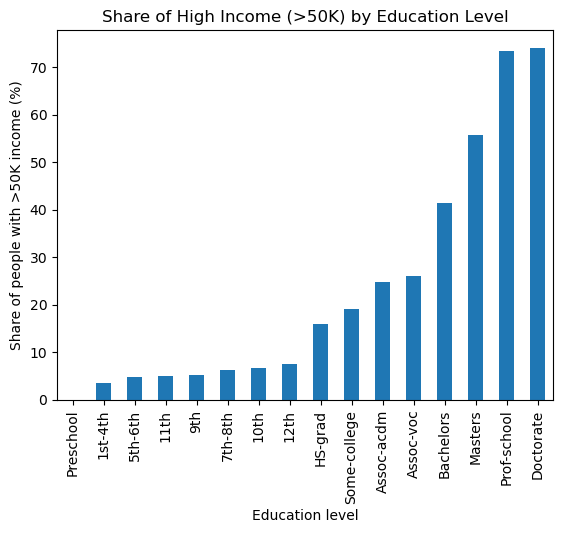

In [15]:
education_salary_share = (
    data
    .groupby("education")["salary"]
    .apply(lambda x: (x == ">50K").mean() * 100)
    .sort_values()
)

# График
plt.figure()
education_salary_share.plot(kind="bar")

plt.ylabel("Share of people with >50K income (%)")
plt.xlabel("Education level")
plt.title("Share of High Income (>50K) by Education Level")

plt.show()

Анализ показывает, что большинство людей с доходом выше 50K имеют высшее или профессиональное образование, однако это не является обязательным условием. В датасете присутствует заметная, хотя и небольшая доля людей без высшего образования, которые зарабатывают более 50K в год. Визуализация подтверждает, что уровень образования существенно повышает вероятность высокого дохода, но не является единственным определяющим фактором.

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [16]:
age_stats = data.groupby(["race", "sex"])["age"].describe()

# Вывод статистики
print(age_stats)

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

In [17]:
max_age_asian_male = age_stats.loc[("Asian-Pac-Islander", "Male"), "max"]

print("Max age of Asian-Pac-Islander males:", max_age_asian_male)

Max age of Asian-Pac-Islander males: 90.0


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [18]:
men = data[data["sex"] == "Male"]

In [19]:
# Женатые мужчины
married_men = men[men["marital-status"].str.startswith("Married")]

# Холостые мужчины
single_men = men[~men["marital-status"].str.startswith("Married")]

In [20]:
# Доля зарабатывающих >50K среди женатых мужчин
married_high_income_share = (married_men["salary"] == ">50K").mean() * 100

# Доля зарабатывающих >50K среди холостых мужчин
single_high_income_share = (single_men["salary"] == ">50K").mean() * 100

print("Married men >50K (%):", married_high_income_share)
print("Single men >50K (%):", single_high_income_share)

Married men >50K (%): 44.05139945351156
Single men >50K (%): 8.449509031397746


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [21]:
max_hours = data["hours-per-week"].max()
print("Max hours per week:", max_hours)

Max hours per week: 99


In [22]:
max_hours_workers = data[data["hours-per-week"] == max_hours]
count_max_hours = len(max_hours_workers)

print("Number of people working max hours:", count_max_hours)

Number of people working max hours: 85


In [23]:
high_income_share = (max_hours_workers["salary"] == ">50K").mean() * 100

print("Share of >50K earners among them (%):", high_income_share)

Share of >50K earners among them (%): 29.411764705882355


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [24]:
hours_stats_table = (
    data
    .groupby(["native-country", "salary"])["hours-per-week"]
    .mean()
    .unstack()
)

print(hours_stats_table)

salary                          <=50K       >50K
native-country                                  
?                           40.164760  45.547945
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary             

**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [27]:
# Группировка по возрастным интервалам
data["age_group"] = pd.cut(
    data["age"],
    bins=[16, 35, 70, 100],
    labels=["young", "adult", "retiree"],
    right=True,
    include_lowest=True
)

# Проверим результат
data[["age", "age_group"]].head()

,age,age_group
0,39,adult
1,50,adult
2,38,adult
3,53,adult
4,28,young


In [28]:
data = data.rename(columns={"age_group": "AgeGroup"})

In [30]:
print (data.shape)

(32561, 16)


**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [31]:
high_income_counts = (
    data[data["salary"] == ">50K"]
    .groupby("AgeGroup")["salary"]
    .count()
)

print(high_income_counts)

AgeGroup
young      1705
adult      6042
retiree      94
Name: salary, dtype: int64


In [32]:
# Доля >50K в каждой возрастной группе
high_income_share = (
    data
    .groupby("AgeGroup")["salary"]
    .apply(lambda x: (x == ">50K").mean())
)

print(high_income_share)

AgeGroup
young      0.114238
adult      0.353416
retiree    0.174074
Name: salary, dtype: float64


In [33]:
most_high_income_group = high_income_share.idxmax()

print("AgeGroup with highest share of >50K earners:", most_high_income_group)

AgeGroup with highest share of >50K earners: adult


**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [34]:
occupation_counts = data.groupby("occupation")["occupation"].count()
print(occupation_counts)

occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
Name: occupation, dtype: int64


In [35]:
def filter_func(group):
    mean_age_condition = group["age"].mean() <= 40
    hours_condition = (group["hours-per-week"] > 5).all()
    return mean_age_condition and hours_condition

In [36]:
filtered_data = data.groupby("occupation").filter(filter_func)

In [37]:
filtered_occupation_counts = (
    filtered_data
    .groupby("occupation")["occupation"]
    .count()
)

print(filtered_occupation_counts)

occupation
Armed-Forces    9
Name: occupation, dtype: int64


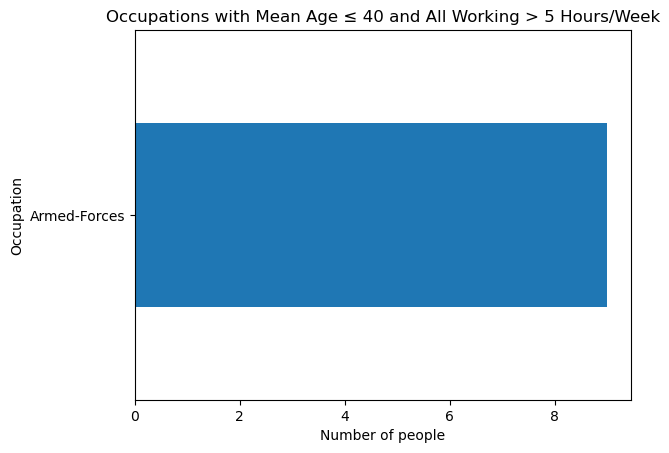

In [38]:
filtered_occupation_counts = (
    filtered_data
    .groupby("occupation")["occupation"]
    .count()
    .sort_values()
)

plt.figure()
filtered_occupation_counts.plot(kind="barh")

plt.xlabel("Number of people")
plt.ylabel("Occupation")
plt.title("Occupations with Mean Age ≤ 40 and All Working > 5 Hours/Week")

plt.show()